# Part 1: Unsupervised Learning with K-Means

## Imports

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler

## Setting up Data Frames

In [7]:
df_red = pd.read_csv("./winequality-red.csv")
df_white = pd.read_csv("./winequality-white.csv")

## Method to Perform Initial K-Means Clustering

In [8]:
def wine_kmeans(df_winetype, wine_name = "WINE"):
    
    print(df_winetype['quality'].value_counts().sort_index())
    
    target_color = df_winetype["quality"]
    df_winetype = df_winetype.drop(columns=["quality"])
    
    wine_scaled = StandardScaler().fit_transform(df_winetype)

    kmeans_results = KMeans(n_clusters = 11).fit(wine_scaled)

    centers = kmeans_results.cluster_centers_
    labels = kmeans_results.labels_
    inertia = kmeans_results.inertia_
    n_iter = kmeans_results.n_iter_

    ari = adjusted_rand_score(target_color, labels)
    nmi = normalized_mutual_info_score(target_color, labels)

    ct = pd.crosstab(target_color, labels, rownames=["quality"], colnames=["cluster"])

    table = PrettyTable()
    table.title = f"{wine_name} K-Means Results"
    table.field_names = ["Metric", "Value"]
    
    table.add_row(["Centers shape", centers.shape])
    table.add_row(["Labels shape", labels.shape])
    table.add_row(["Inertia", f"{inertia:.2f}"])
    table.add_row(["Iterations", n_iter])
    table.add_row(["ARI", f"{ari:.3f}"])
    table.add_row(["NMI", f"{nmi:.3f}"])
    
    return labels, table, ct

## K-Means for Red Wine

In [9]:
red_kmeans = wine_kmeans(df_red, "Red Wine")
print(red_kmeans[1])
print(red_kmeans[2])

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64
+--------------------------+
| Red Wine K-Means Results |
+---------------+----------+
|     Metric    |  Value   |
+---------------+----------+
| Centers shape | (11, 11) |
|  Labels shape | (1599,)  |
|    Inertia    | 7496.01  |
|   Iterations  |    24    |
|      ARI      |  0.048   |
|      NMI      |  0.108   |
+---------------+----------+
cluster   0   1    2   3   4    5   6   7   8   9    10
quality                                                
3          5   0    2   0   0    0   0   0   1   0    2
4         19   1   16   4   2    0   3   1   3   1    3
5        142  13  109  90   9  159  25  15  40  16   63
6        108   5   49  93  88   29  61  12  83   6  104
7         17   1    1   8  80    0  22   5  21   1   43
8          0   0    0   1   8    0   4   0   1   0    4


## K-Means for White Wine

In [10]:
white_kmeans = wine_kmeans(df_white, "White Wine")
print(white_kmeans[1])
print(white_kmeans[2])

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64
+----------------------------+
| White Wine K-Means Results |
+----------------+-----------+
|     Metric     |   Value   |
+----------------+-----------+
| Centers shape  |  (11, 11) |
|  Labels shape  |  (4898,)  |
|    Inertia     |  26811.43 |
|   Iterations   |     23    |
|      ARI       |   0.025   |
|      NMI       |   0.068   |
+----------------+-----------+
cluster   0    1    2    3    4    5    6   7    8    9    10
quality                                                      
3          2    4    0    6    0    0    2   1    2    3    0
4          8   40    2   10    5   11   12   3   49    9   14
5        180  201  134  276   45  147   34  46  203  101   90
6        237  265  288  239  178  106  264  46   84  296  195
7         64   90  107   26  151   14  242   2   11  119   54
8         12    8   27    8   36    4   53   2    3   15    7
9          0    1    0    0 

## Method to Calculate Average Quality for Clusters

In [11]:
def avg_quality(df_winetype, labels):
    df_copy = df_winetype.copy()
    df_copy['cluster'] = labels

    cluster_quality_avg = df_copy.groupby('cluster')['quality'].mean().reset_index()
    cluster_quality_avg.columns = ['cluster', 'avg_quality']
    
    return cluster_quality_avg

## Average Quality for Clusters (Red Wine)

In [12]:
avg_red_df = avg_quality(df_red, red_kmeans[0])
print(avg_red_df)

    cluster  avg_quality
0         0     5.388316
1         1     5.300000
2         2     5.175141
3         3     5.551020
4         4     6.443850
5         5     5.154255
6         6     5.991304
7         7     5.636364
8         8     5.825503
9         9     5.291667
10       10     5.890411


## Average Quality for Clusters (White Wine)

In [13]:
avg_white_df = avg_quality(df_white, white_kmeans[0])
print(avg_white_df)

    cluster  avg_quality
0         0     5.773360
1         1     5.697865
2         2     6.041219
3         3     5.518584
4         4     6.404819
5         5     5.478723
6         6     6.484452
7         7     5.510000
8         8     5.176136
9         9     6.038674
10       10     5.861111


## Function to Plot Average Quality from Previous Steps

In [14]:
def plot_quality(avg_winetype_df, name = "WINE"):
    
    if name.lower() == "red wine":
        bar_color = "#4a0720"
    elif name.lower() == "white wine":
        bar_color = "#4b5c3b"
    else:
        bar_color = "skyblue"
    
    plt.figure(figsize=(8,5))
    plt.bar(avg_winetype_df['cluster'], avg_winetype_df['avg_quality'], color=bar_color, edgecolor="black")
    plt.xlabel("Cluster")
    plt.ylabel("Averge Quality")
    plt.title(f"Avg Quality per Cluster: {name}")
    plt.xticks(avg_winetype_df['cluster'])
    plt.ylim(avg_winetype_df['avg_quality'].min() - 0.5, avg_winetype_df['avg_quality'].max() + 0.5)
    
    plt.show()

## Average Quality Plot (Red Wine)

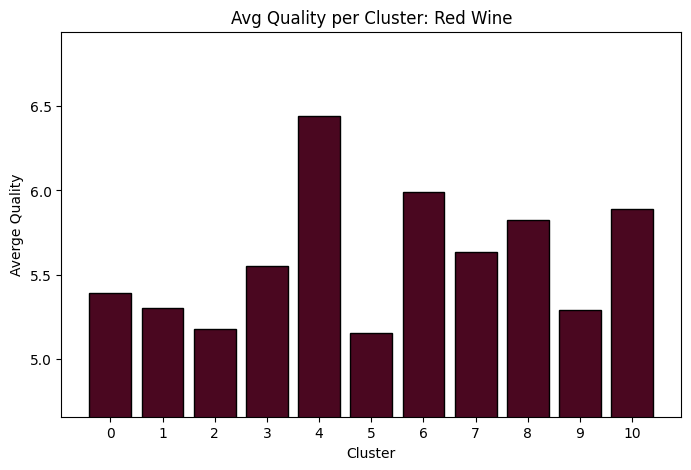

In [15]:
plot_quality(avg_red_df, "Red Wine")

## Average Quality Plot (White Wine)

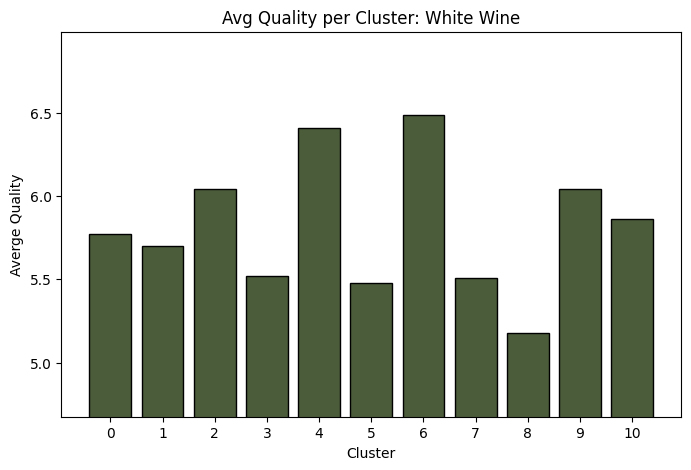

In [17]:
plot_quality(avg_white_df, "White Wine")